In [2]:
#도미 데이터
#샘플, 특성, 관측 이라는 용어라고 함.
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
#그래프로 특성 보기
import matplotlib.pylab as plt

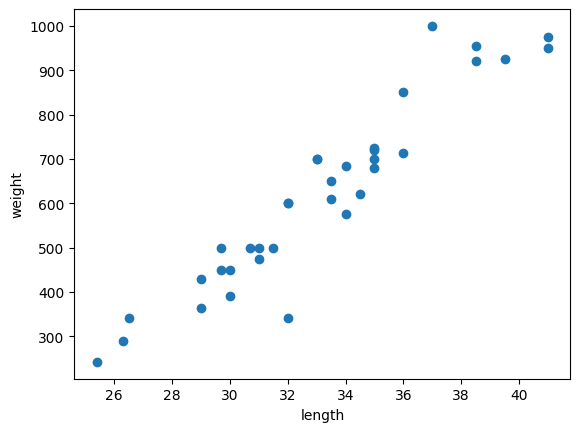

In [4]:
#산점도(scatter plot) 으로 보기
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이 코드들 4줄을 한번에 실행 시킨이유는 x축, y축 라벨까지 포함된 그래프임.

In [5]:
#빙어 데이터 보기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

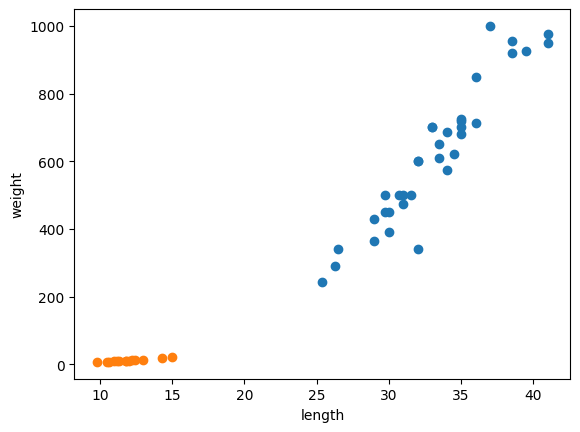

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#이렇게 한번에 실행하면, bream 따로, smelt 따로 보이는게 아니라 하나의 그래프에 각각 색깔 다르게 표현해준다. 

In [7]:
#도미와 빙어 데이터 하나로 파이썬 데이터로 합치기 (연산자 오버로딩을 통해서)
'''헉 연산자 오버로딩이 뭐였지...'''
length= bream_length+smelt_length
weight = bream_weight+smelt_weight

In [8]:
#2차원배열의 사이킷런 스럽게 표현해주기 
#리스트 내포. 리스트 안에 for 문 들어가 있는거.
fish_data = [[l, w] for l, w in zip(length, weight)]

In [9]:
# fish_data

In [10]:
#정답데이터 준비
fish_target = [1]*35 + [0]*14
#어떤게 도미고, 어떤게 빙어인지 모르기 때문에 우리가 규칙을 알려줘야함. 이게 바로 지도학습임. 
#도미를 1, 빙어를 0. 도미를 찾고싶을때 1로 두는거임. 
# fish_target

In [11]:
#머신러닝 본격 시작
#k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier() #클래스 객체를 인스턴스화함
kn.fit(fish_data, fish_target) #fit 메소드 훈련시키는거. 
kn.score(fish_data, fish_target) #학습 잘됐는지 확인하는거 -> 1.0 이면 100퍼센트 다 맞췄다는거임.정확도라고함.

1.0

In [14]:
#최근접 이웃 알고리즘이 어떻게 동작하는지 알아보기
#샘플 데이터도 2차원배열로 넣어줘야함. fit할때도 2차원배열로 넣었으니. 
kn.predict([[30, 600]]) #길이 30, 무게 600 -> 도미를 말함.
#array([1]) 로 나온건 도미라는 뜻임. array 형태로 갖고 있다는 뜻. 
# 주위에 있는 샘플로 보고 도미라고 예측한거임. 
# k의 기본은 5임. 5개의 샘플을 보고 예측하는거임

array([1])

In [15]:
kn.predict([[9, 6]]) #길이 9, 무게 6 -> 빙어로 예측함

array([0])

In [16]:
#neighbors 기본인 5인데 -> score 1.0 나왔었음.
#이걸 한번 k 최근접 이웃을 늘려서 예측해보겠다. 
# n_neighbors=49 라고 직접 지정해줌
#전체 샘플의 다수는 도미인데, 49개의 샘플은 당연 도미 말하겠지. 
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target) #훈련
kn49.score(fish_data, fish_target) #점수 출력
#71퍼센트의 정확도가 나온걸 알 수 있다. 

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.7142857142857143

In [17]:
#35개는 도미인데 역시나 71프로의 정확도가 나옴을 볼 수 있다. 
print(35/49)
#이렇게 k neighbors 수를 바꾸면 정확도가 더 높아질수도 있고, 낮아질수도 있다.

0.7142857142857143


In [18]:
#훈련세트와 테스트 세트로 나눠보기
#35개
train_input = fish_data[:35]
train_target = fish_target[:35]

In [19]:
#14개
test_input = fish_data[35:]
test_target = fish_target[35:]

In [20]:
#테스트 세트에서 평가하기
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)

In [21]:
kn.score(test_input, test_target)
#정확도 0퍼센트 나옴. 잘못된 훈련 데이터임. 왜냐면, 빙어랑 도미가 서로 나눠져있는 상태로 테스트를 한거라서.

0.0

In [22]:
#넘파이 사용하기
import numpy as np

In [23]:
#predict 는 넘파이 배열로 변환하고 과정이 많음
input_arr = np.array(fish_data) #35개, 14개로 나누기 전의 데이터를 np.array 했음.
target_arr = np.array(fish_target)

In [24]:
# print(input_arr)

In [25]:
#데이터 섞기
#입력과 타겟이 섞여서 진행되어야함. 인덱스를 섞어서 하는게 가장 효과적인 방법임
index = np.arange(49)
np.random.shuffle(index)

In [26]:
index

array([25, 45, 10,  8, 39, 29, 19,  0, 43, 46, 17, 30, 41, 38, 11, 33, 18,
       47, 23,  9, 34,  4, 37, 35,  1,  6, 44, 20, 15,  2, 40, 27, 32, 16,
       12,  5,  3, 26, 13, 48, 21,  7, 31, 36, 22, 28, 24, 14, 42])

In [27]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

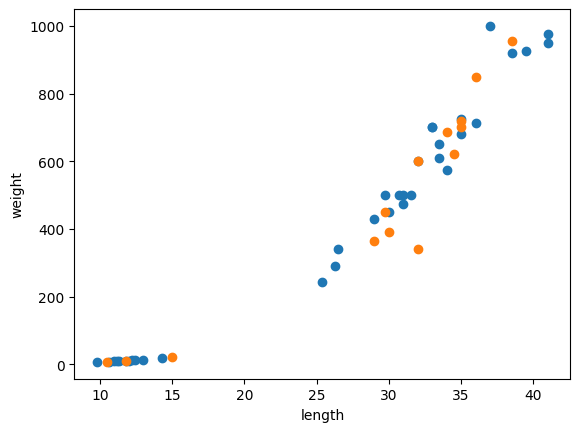

In [28]:
#데이터 나누고 산점도로 확인하기
import matplotlib.pyplot as plt

#훈련데이터는 파란색, 테스트 데이터는 주황색
plt.scatter(train_input[:, 0], train_input[:, 1]) #전체 행, 첫번째열(length), 전체행 두번째열(weight)
plt.scatter(test_input[:, 0], test_input[:, 1]) #전체 행, 첫번째열, 전체행 두번째열
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
#두 번재 머신러닝 프로그램 만들어보기
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) #정확도 100프로 나옴

1.0

In [32]:
#넘파이로 데이터 준비
fish_data = np.column_stack((length, weight))

In [34]:
# fish_data

In [36]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [37]:
#사이킷런으로 데이터 나누기
from sklearn.model_selection import train_test_split

In [40]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [41]:
# 수상한 도미
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [43]:
print(kn.predict([[25, 150]]))
#0이라고 나온건 빙어. 도미일거같은데, 빙어라고 함. 

[0.]


In [46]:
distances, indexes = kn.kneighbors([[25, 150]])
#25cm, 150g 의 가장 가까운 거리, 인덱스 뽑아줌.

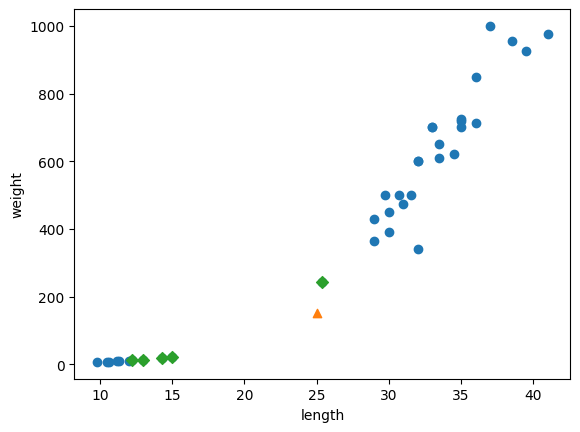

In [47]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^') #마름모로 표현하겠다는 뜻이다. marker='^'
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#멀리있는 빙어 4개를 가장 가까운 이웃으로 측정한다. 잘못된거다. 왜냐면 
# 우리눈에는 가까워보이지만 scale 이 맞지 않아서, 실제로는 가까운게 아니란 거다.
#y축의 scale 과 x 축의 scale이 맞지않아서 생긴 문제인거다.

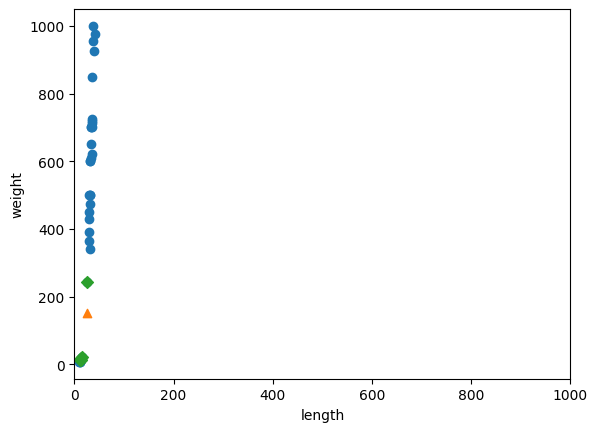

In [56]:
#기준을 맞춰라. 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') #마름모로 표현하겠다는 뜻이다. marker='^'
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) #xlim 함수는 축의 스케일을 수동으로 지정할 수 있는 거다. 
#결국, 무게가 생선을 구분하는데 아주 큰 영향을 준다는걸 알수 있다. 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#결국 두 스케일의 특성을 맞춰줘야하는거다. 스케일 맞춰주는 알고리즘 굉장히 많다. 
# knn 이 이런게 수동작업 필요한거다. 

In [61]:
#여러가지 변환 방법이 있는데, 대표적인게 표준 점수로 바꾸는거다. 
# 특성-평균/표준편차 = z 정수 라고 함 . 사이킷런에는 도구가 있다.
#특성의 평균을 구해야한다. 길이 특성, 무게 특성을 따로 구해보자.
mean = np.mean(train_input, axis=0) #mean() 넘파이 평균 구해주는 함수임.
std = np.std(train_input, axis=0) #std()넘파이 표준편차 구해주는 함수. axis 는 축.
#axis = 0 으로 해야 행을 쭉따라서 계산하여 각 특성별 평균 및 표준편차가 구해짐. row 1, column 2 (1,2)
#만약 , axis=1 로 하면 각 row 별로 평균 및 표준편차가 구해지는거임 row 36, column 1 (36,1)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [65]:
train_scaled = (train_input - mean) / std
#샘플 36개, 특성 2인 (36,2) train_input에서 1, 2인 mean을 빼주면 
# 넘파이가 똑똑하므로, 모든 배열에 (1,2)를 적용해서 알려준다. 
# 이걸 바로 넘파이의 브로드캐스팅이라고 함. 메모리 효율적으로 관리할 수 있게 해줌~!
#결과는 계속 (36,2 ) 를 유지함.

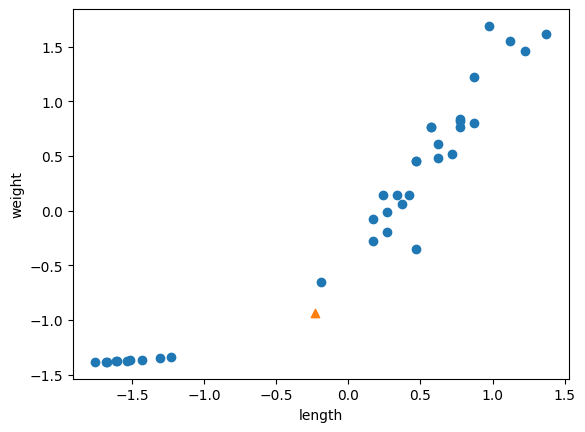

In [72]:
#수상한 도미 다시 표시하기
new = ([25, 150] - mean) / std #길이25, 무게150 : 수상한 도미. 
#샘플이 하나이므로, 평균 과 표준편차 낼수가없으므로 훈련세트의 mean으로 빼고 훈련세트의 std로 나누어줬다.

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#0을 중심으로 데이터가 잘 퍼져있는걸 볼 수 있다. 

In [75]:
#전처리 데이터에서 모델 훈련
kn.fit(train_scaled, train_target) #train_scaled, train_target은 변환된 데이터이다. 

test_scaled = (test_input - mean) / std #test_input 도 스케일 맞게 변환해줘야 동떨어져보이지 않음
#test_input과 mean 과 std 모두 넘파이 배열이다. 넘파이 배열끼리 빼기, 나누기 다 해줬다. 
#이게 브로드캐스팅 특성이라고 한다. 넘파이 배열에서만 브로드캐스팅이 제공된다.
kn.score(test_scaled, test_target) # test_target는 스케일 조정 대상이 아니다. 정답이니까.

1.0

In [76]:
print(kn.predict([new]))

[1.]


In [77]:
#어떻게 도미로 출력했을지 알아보기 [1.]
distances, indexes = kn.kneighbors([new])
# kneighbors 메소드는 디버깅 목적으로 new 샘플과 가장 가까운 샘플 5개를 추출하여, 
# 디스턴스, 그 샘플의 인덱스를 추출해준다.
# 어떤 샘플이 가장 가까운 이웃인지 출력할 수 잇다.

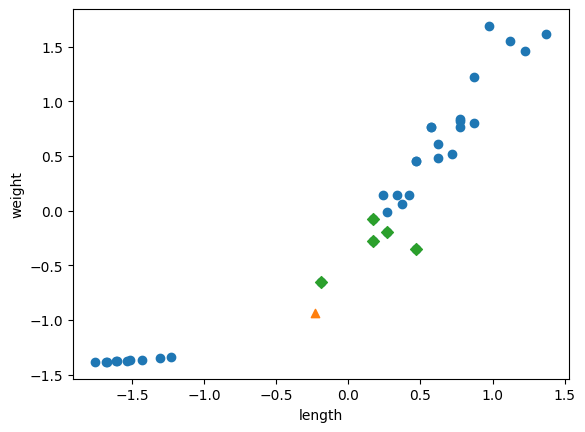

In [87]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0],new[1], marker='^') 
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
#marker = '^' 는 삼각형, 'D'는 다이아몬드
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#스케일을 조정해서 k이웃을 제대로 볼 수 있다.
# 이걸 다 전처리 한다고 함. 어느정도 필요하다. 실전에서는 지루하고 반복적인 작업이라고 함.
#트리기반 모델은 전처리 과정이 필요없다고 함. 

In [ ]:
#회귀문제 : 농어의 무게를 임의의 숫자를 예측하는것.
# 종류를 구분하는것이 아니라 임의의 숫자를 예측하는것. 
# regression
# 이진분류에서는 타깃값 0, 1 이었는데 
# 회귀에서는 타깃이 임의의 숫자이다. 
# 농어의 무게를 예측하라 -> 타깃 : 농어의 무게 = 실제 데이터가 타깃이 되는거임.
# 두 변수의 상관관계를 분석하는 의미로 회귀라는 말을 써옴. 
# 지도학습에는 분류 / 회귀 가 있는데 사전적의미로 생각하지 말자. 

In [88]:
#k-최근접 이웃 회귀
# 이웃의 클래스의 평균을 내는거다.

In [91]:
# 농어의 길이만 사용하여 농어의 무게 예측하기(회귀)
import matplotlib.pyplot as plt
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

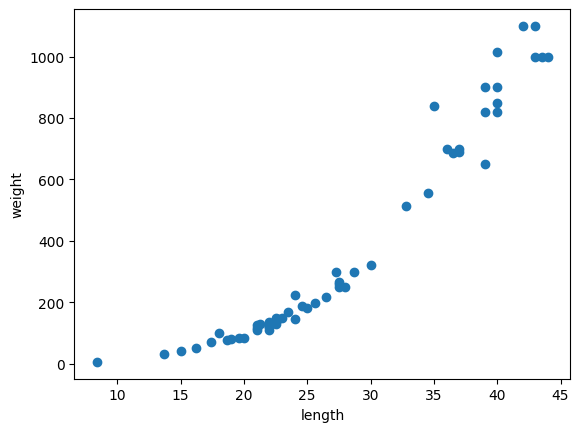

In [96]:
plt.scatter(perch_length, perch_weight)
#perch_weight 는 우리가 구하려고하는 타깃값이다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#회귀는 대부분 특성 하나만 보는걸로 시작한다. 
#길이와 무게의 관계가 있고 잘 예측해서 모델링해야겠다.

In [97]:
#훈련 세트 준비하기
from sklearn.model_selection import train_test_split
#train_test_split을 이용하여 훈련세트와 테스트 세트로 나누어보겠다.

In [99]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# stratify 는 기본값이 False 인데 특별히 지정하지 않으면 적용이 안된다고 함.
# 회귀에서는 랜덤으로 값을 돌리는게 좋을것 같아서  stratify 를 안썼다. 
# 회귀에서는 임의의 숫자가 타깃이 되기에.
# 위에서는 stratify=fish_target 라고 썼었다. 타깃값을 넣어줬었는데. 

# perch_length가 1차원배열이라서 train_input, test_input 도 1차원 배열로 나온다고 함. 
# 사이킷런은 기본적으로 2차원배열을 기대하기 때문에 아래의 reshape 을 통해서 바꿔줘야해.

#테스트 데이터인 train_target과 test_target 은 1차원 배열 그대로 잇어도 된다. 
# 훈련 데이터만 특성이 열방향으로 잇어야하기에 train_input, test_input 은 2차원 배열로 바꿔야한다.

In [101]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)
#train_input,test_input은 넘파이 배열임. 
#행차원 -1 : 나머지 차원이 다 결정되고, 남은 차원을 나에게 할당해라는 뜻이다. 
#두번째 차원을 1로 둠. 하나의 열이 있는 2차원이 만들어짐.
#원소의 개수는 변하지 않고, 형태만 바뀔수 잇다. 

#예시
# [1, 2, 3] 은 크기 : (3, ) 이다. 일차원배열. 
# 이걸 reshape 메소드 써서 (-1,1) 하면 열이1개, 행방향 개수는 남은 차원 할당 해서 3 행이되는거다.
# [[1],
#  [2],
#  [3]
# ] 로 바꾸면 크기는 : (3,1) 이다. 

In [102]:
#회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

In [105]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target) #훈련데이터, 타깃데이터 전달
knr.score(test_input, test_target)
#정확도는 0.9~~
#회귀에서는 R^2 결정계수, R 스퀘어, 
#R스퀘어는 0~1 사이에 나오고 , 1에 가까울수록 좋은 모델. 

0.992809406101064

In [106]:
from sklearn.metrics import mean_absolute_error
# mean_absolute_error 평균 절대값 오차 
#이런 측정지표들이 metrics 모듈 안에 많다. 

In [109]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
#test_target과 test_prediction 의 차이값만 출력해준다. 
print(mae)
# 19g 정도 오차가 난다고 볼 수 있다. 높게 예측했는지, 낮게 예측했는지 알 수없다. 
# 절대값으로 본거라.

19.157142857142862


In [110]:
#과대적합과 과소적합
knr.score(train_input, train_target)

0.9698823289099254

In [111]:
knr.score(test_input, test_target)

0.992809406101064

In [112]:
# 훈련점수가 높게 나오고, 테스트 점수가 낮게나오는게 일반적이다.
# 과소적합 underfitting : 테스트 세트 점수가 높아서, 훈련세트가 적절히 학습되지 못했다.
# 과대적합 overfitting, 과적합 : 너무 훈련세트가 잘 맞아서, 실전에 투입했을땐 형편없는 값을 내는 모델.

In [120]:
#이웃 개수 줄이기
knr.n_neighbors = 3
#최적의 이웃값은 문제마다 다르다. 우리가 정해야한다. 이렇게 우리가 정해야하는걸 하이퍼파라미터.

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [121]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [123]:
#문제가 발견됐다.
print(knr.predict([[50]])) #50cm 짜리 농어를 넣어봄. 

[1033.33333333]


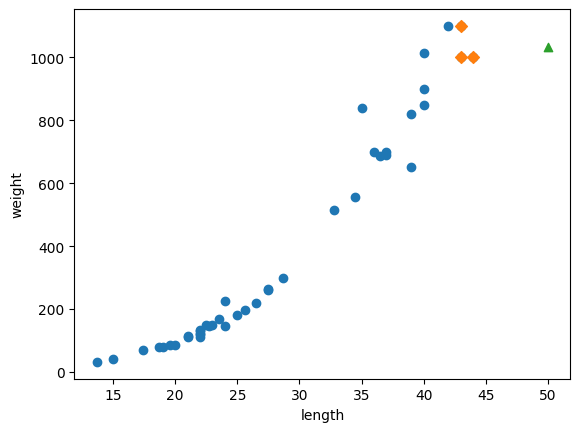

In [131]:
#최근접 회귀에 왜 이런 문제가 발생한걸까?
distances, indexes = knr.kneighbors([[50]]) #50cm 농어의 이웃 구하기

#훈련세트의 산점도를 그린다.
plt.scatter(train_input, train_target) 
#훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes],marker = 'D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#한마디로 최대값이 제한된다. 
#범위를 바깥으로 넘어가면, 값을 추정하기가 힘들어진다. 

In [ ]:
#선형 회귀 linear regression
#좋은 직선의 방정식을 찾는 알고리즘이 선형회귀이다. 

In [132]:
from sklearn.linear_model import LinearRegression
#사이킷런의 선형회귀는 linear_model 모듈 안에 있다.

In [138]:
lr = LinearRegression()
lr.fit(train_input, train_target) #선형회귀 모델 훈련

#50cm 농어에 대한 예측
print(lr.predict([[50]])) #1.2kg 정도로 나옴.

print(lr.coef_, lr.intercept_)
#coef_, lr.intercept_ 사이킷런에서는 학습한 모델들은 다른 속성과 구분되라고 밑줄문자가 끝에 있음
#coef_ 기울기는 39 . 넘파이 배열임. 
#lr.intercept_ y절편은 -709 로 나온거임. 스칼라값.

[1241.83860323]
[39.01714496] -709.0186449535474


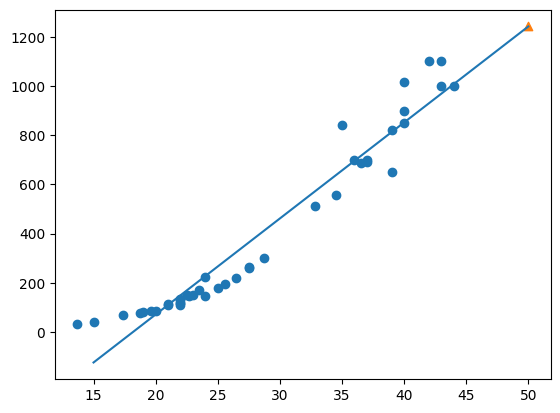

In [149]:
#학습한 직선 그리기 (잘 학습했는지 확인해볼거임)
#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#15~ 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

In [147]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#과소적합된게 아닌지 의심됨

0.9398463339976041
0.824750312331356


In [150]:
#선형모델의 단점 중 하나가 왼쪽끝을 보면 음수로 떨어지는걸 볼 수 있다. 
#산점도를 잘 보면 살짝 굴곡진 2차 함수의 모습을 보인다. 
#2차 함수의 방정식을 선형회귀로 만들어보ㄴ겠다.
#다항 회귀

In [152]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [155]:
#모델 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) 
#x의 제곱항 추가됨. ax^2 + bx . 위에서 np.column_stack((train_input **2, train_input)) 맞춰준거
print(lr.coef_, lr.intercept_)
#무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05
# y = 1.01 x^2 - 21.6x + 116.05

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


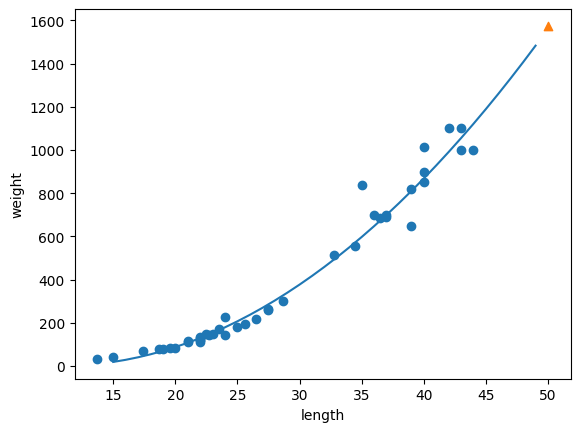

0.9706807451768623
0.9775935108325123


In [189]:
#학습한 직선 그려서 확인해보기

#구간별 직선을 그리기 위해 15~49까지 정수 배열 만든다.
point = np.arange(15, 50)

#훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

#15~ 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#선형회귀때보다 모델성능이 더 좋다. 하지만 테스트 성적이 더 높다. 과대적합이 좀 더 필요해보임.
#여러 특성으로 예측하기엔 힘들것이다. 

In [163]:
#특성이 많아지면 선형회귀의 힘이 strong
#수동으로 특성을 조합하여 제곱항 만들지 않고, 사이킷런의 특성공학 기능을 써볼거임.

#판다스로 데이터 준비
import pandas as pd
#4차원배열 DataFrame 이 기본. 엑셀시트와 비슷하게 생각하면 됨. 

In [191]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full) #길이 높이 두께 

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [192]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [194]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [167]:
#다항 특성 만들기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures 을 사이킷런의 변환기라고 함. Transformer -> fit(), transform()
# 하지만 PolynomialFeatures의 fit 메소드는 실제로 학습하는거가 아니라고 한다.
# 해봤자, 특성이 몇개 있구나, 2와 3을 곱해서 어떤 조합을 만들어야겠다 정도라고 함.
# fit_transform() 메소드도 있다고 함. 두가지 기능을 하도록.
# LinearRegression은 사이킷런의 추정기라고 함. Estimator -> fit(), predict(), score()

In [195]:
#degree = 2 : 기본값. 제곱항을 만들어주는거
poly = PolynomialFeatures()
poly.fit([[2,3]]) 

#1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]])) 
#1은 절편을 위한 특성, 2, 3 은 임의의 특성, 4는 2의제곱, 6은 2*3, 9는 3의 제곱
#절편을 위한 가상의 특성 1을 추가하는 경우가 있음. 
#linear Regression class 가 1을 무시한다고 함;;;

[[1. 2. 3. 4. 6. 9.]]


In [196]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [200]:
#농어 데이터 이용해서 
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape) #42개의 샘플, 9개의 특성

# #각 9개 특성이 어떻게 만들어졌는지 확인하는 방법
poly.get_feature_names_out()

test_poly = poly.transform(test_input)
#훈련세트에서 변환은 테스트 세트에도 적용해야하는 습관을 길러야해. 

(42, 9)


In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#특성을 9개로 만들었기에 더 적합하게 점수가 나옴. 

0.9903183436982126
0.9714559911594125


In [205]:
# 더 많은 특성 만들어보기
# degree 의 기본값이 2인데, 5로 늘려서 만들어보기
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
#degree가 5 이기에, 특성이 많이 늘어나서 특성이 55개나 됨. 

(42, 55)


In [209]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#훈련세트는 거의 오차없이 완벽한데,
#테스트 세트에서는 R스퀘어가 음수가 나옴을 볼 수 있다. 
#어마어마한 과대적합이 되어, 굉장히 안좋은 케이스다. 
#훈련개수가 42개인데, 특성이 55개라서 
#맞춰야할 대상보다 사용할 도구(특성)가 훨씬 많아서 생긴 일이다. 
#그치만, 이런 과대적합을 줄일 수 있는 방법이 있다. 규제 (regularization), 정규화라고 한다. 
#규제는 완화시킨다. 가중치, 기울기 값을 작게 만들어주는거다. 
#릿지 회귀, 라쏘 회귀가 있다. 

0.9999999999997232
-144.40564483377855


In [213]:
#linear Regression은 scale 할 필요가 없다. 특성의 크기에 영향을 받지 않는다.
# 근데 규제를 하려고 하면 상황이 좀 변한다.
# 규제는 기울기, 가중치가 너무 높으면 벌칙을 준다. 
# 근데 특성의 SCALE이 비슷해져야지 기울기도 비슷한데, 이게 다른 상태에서 규제가 벌칙을 주면 같은 조건이 아닌거다.

#z점수, 표준점수로 바꿔주는 사이킷런 클래스를 쓸거다.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) #55개의 특성을 넣어서 훈련한다.

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [218]:
#릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) #표준점수로 변경한 훈련모델을 넣는다.

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#극도로 나빴던 테스트점수가 좋아졌다. 
#릿지를 통해 억지로 막아서 규제모델을 만든거다.
#릿지의 방식은 가중치의 제곱(모델 파라미터라고함)을 벌칙으로 사용한다. L2규제라고 함.
#규제 강도가 있다. alpha 매개변수 기본값이 1이다. 작게하면 강도작아지고, 크게하면 강도커짐

0.9896101671037343
0.9790693977615387


In [233]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

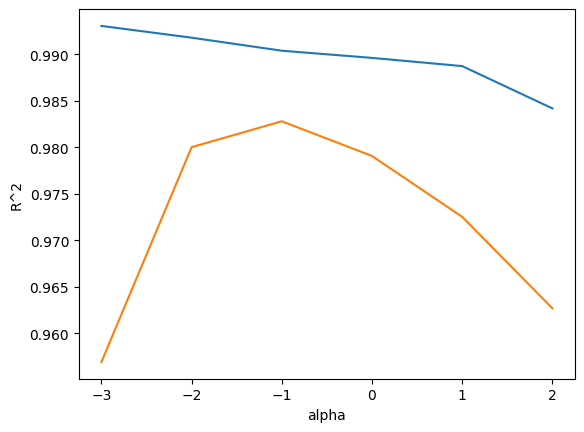

In [234]:
#alpha 값 바꿔가며 확인해보기 (우리가 정해주는 값이라서, 하이퍼파라미터라고함)
#alpha 값 바꿔가며 좋은 값 찾아가는 과정을 하이퍼파라미터 탐색이라고 함. 

#alpha 리스트로 여러개 예시 만들어놓기
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100] #보통은 이렇게 10의 배수로 함. 
for alpha in alpha_list:
    #릿지 모델을 만든다.
    ridge = Ridge(alpha=alpha)
    #릿지 모델을 훈련한다.
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장한다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [237]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [241]:
#라쏘 회귀
#가중치 절대값을 벌칙으로 줌 L1규제라고 함 
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [246]:
train_score = []
test_score = []
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100] #보통은 이렇게 10의 배수로 함. 
for alpha in alpha_list:
    #릿지 모델을 만든다.
    lasso = Lasso(alpha=alpha)
    #릿지 모델을 훈련한다.
    lasso.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장한다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

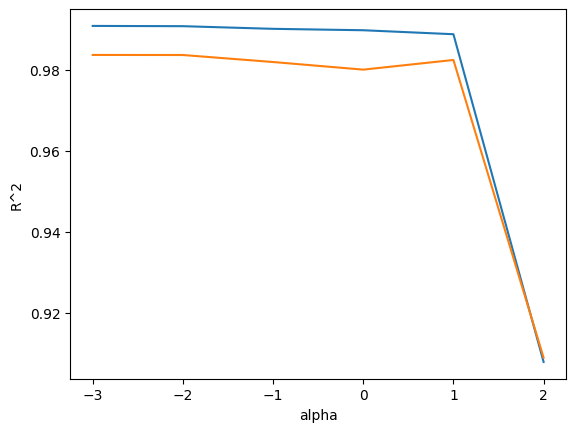

In [247]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [248]:
lasso= Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40


In [249]:
#일반적으로 라쏘보다는 릿지가 더 효과적이라고 함. 

In [ ]:
############ 로지스틱 회귀

In [ ]:
#분류 알고리즘 
# 확률을 예측한다고 무조건 회귀 문제는 아니다
#분류에 대한 확신을 확률로 표현할 수 있다. 

In [251]:
import pandas as pd
import numpy as np

In [252]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [253]:
fish.head() #데이터셋의 테이블로 예쁘게 보여줌. CSV의 헤더 목록으로 표현해줌.. 
#0번째 열인 0 1 2 3 4 는 원래 csv에는 없지만, 판다스가 만들어준거임. 
#첫번째 열인 Species 은 타겟
#나머지 5개 열은 feature 가 됨. 

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [259]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [260]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
#5개의 열만 뽑아서 fish_input에 넣어줌. 뽑은 데이터프레임을 넘파이 배열로 넣어줌. 
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()
#타겟데이터는 리스트로 만들지 않고, 따로 타겟으로 넘파이 배열로 만들어줌. 

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
#이제 훈련 / 테스트 세트 나눠보기. 
#k최근접이웃을 올바르게 사용하기 위해서 표준점수로 전처리 해줘야해. 

In [263]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [266]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [267]:
# k-최근접 이웃의 다중 분류
from sklearn.neighbors import KNeighborsClassifier

In [268]:
kn = KNeighborsClassifier(n_neighbors=3) #원래 5인데 3으로 우리가 지정함. 
kn.fit(train_scaled, train_target)
#사이킷런은 문자열도 정수로 바꿔서 분류를 한다고 함. 

KNeighborsClassifier(n_neighbors=3)

In [270]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [271]:
print(kn.classes_) #모델 클래스로부터 학습한 경우에 언더바가 붙는거다. 
#알파벳 순서로 출력된다

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [272]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [274]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#사이킷런은 predict_proba 메소드 제공함
#predict_proba 메소드와 predict 메소드의 결과가 같아야한다. 

In [ ]:
#로지스틱 회귀
#분류알고리즘의 대표적인것. 인공신경망의 기본이 됨. 은닉층이 없는. 
#선형회귀와 굉장히 비슷. 선형함수를 학습하는 알고리즘임. 
#시그모이드 함수 또는 로지스틱 함수가 필요함. 
# 0.5를 기준으로 양성 클래스 / 음성 클래스 
# 이름은 회귀이지만, 분류알고리즘. 
# z값만 보더라도 양성 / 음성 클래스 판단 가능. 
# 하지만 확률을 뽑고싶다면 시그모이드 함수를 얹어야해. 
# predict 함수는 z 값만 보고 판단한다. 
# predict_proba 는 파이값을 계산해서 확률값을 뽑아낸.. 
# 딱 0.5일 경우? 음성으로 하냐, 양성으로 하냐 는 선택사항일뿐. 일반적으로 음성으로 기준함. 

In [277]:
#로지스틱 회귀(이진분류)
#불리언 인덱싱으로 만들어짐
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
lr = LogisticRegression()

In [281]:
lr.fit(train_bream_smelt, target_bream_smelt)#훈련
print(lr.predict(train_bream_smelt[:5]))#예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [282]:
print(lr.predict_proba(train_bream_smelt[:5])) #확률
#음성클래스에 대한 확률  양성클래스에 대한 확률
#도미Bream 1(양성) 빙어 0(음성)
#근데 알파벳 순으로 되면서 도미가 0(음성), 빙어가 1(양성)이 됨.. 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [284]:
#로지스틱 회귀 계수 확인
print(lr.coef_, lr.intercept_)
#z = 무게   길이    대각선    높이    두께   y절편?

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [286]:
decisions = lr.decision_function(train_bream_smelt[:5])
#decision_function 은 z 값을 출력해주는 함수이다. 
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [288]:
from scipy.special import expit as sigmoid
#as sigmoid 라고 덧붙여야 실행이 된다

In [290]:
print(sigmoid(decisions))
#양성 클래스의 z값을 출력하는걸 알수있다. 

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀(다중 분류)

In [294]:
lr = LogisticRegression(C=20, max_iter=1000)
#max_iter는 반복횟수. 기본은 100임. 근데 적으니까 1000으로 올림. 반복학습 많이함.
# 로지스틱회귀는 L2노름 사용하는 규제가 기본적용되있는데, 그 강도를 정해야한다. 
# 대문자 C 매개변수로 쓰고 숫자크면 규제 약해지고, 내려가면 규제가 강해짐. 
# C규제 기본값은 1임.

lr.fit(train_scaled, train_target)
#정확도를 출력하게 됨 
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [296]:
#5개 샘플의 확률을 출력. (5개 샘플, 7개 클래스의 확률)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [297]:
print(lr.coef_.shape, lr.intercept_.shape)
#7개행 5개열의 행렬이 나옴. 5는 특성곱해지는 계수.
#7은 z값, 클래스마다 1개씩 만들어진다는 뜻. 
#가장 큰 값이 예측 클래스가 된다. 
#이진분류를 7번 실행한다.. 이진분류를 많이해서 다중 분류를 하는걸 OVR 라고함
#어떻게 7개의 z를 확률로 바꿀수 있었을까.
#7개의 z를 시그모이드에 통과시키면 합이 1이 되기 힘들거다. 
# 그래서 다중분류일때는 시그모이드 함수가 아닌 소프트맥스 함수를 쓰는 편이다.

(7, 5) (7,)


## 소프트맥스 함수

In [299]:
decision = lr.decision_function(test_scaled[:5])
#5개 샘플에 대해 7개의 결정함수가 출력이 됨. 
#이 z 값을 지수함수에 적용한다. 
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [302]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
#round 를 통해 끝자리 제한을 뒀다. 

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [303]:
#로지스틱 회귀에서 시그모이드 함수는 이진분류일 때 확률을 표현하기 위한 수학적 트릭,
# 소프트맥스 함수는 다중분류일때 확률처럼 표현하기 위한 수학적 트릭.

## 확률적 경사 하강법

In [304]:
# 알고리즘이 아니다. 최적화하는 방법일뿐이다. 
# 알고리즘의 최적의 값을 찾아주는거다. 온라인 학습, 점진적 학습....
# Stochastic Gradient Descent, SGD

## 손실 함수

In [305]:
# 얼마나 나쁜지 측정하는 함수
# 정확도는 손실함수로 측정할 수 없다.
# 미분가능하지 않다.

## 로지스틱 손실 함수 (= 이진 크로스 엔트로피 손실 함수)

In [306]:
# 회귀에서는 손실함수=측정지표
# 정답에 가까운것은 낮은 값이 되고, 먼 건 높은 값이 되는.
# 가까운건 손실값이 낮고, 먼건 손실값이 높아지는거.

## 데이터 전처리

In [307]:
# 경사하강법 쓰기전에는 반드시 데이터 전처리 해줘서
# 표준점수를 같게해줘야한다. 스케일!

In [314]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [315]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [316]:
from sklearn.preprocessing import StandardScaler #특성 스케일 조정해줘야해! 
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
#훈련, 테스트 세트도 꼭 transform 해줘야해.

## SGDClassifier

In [330]:
#SGD는 모델이 아니라, 최적화해주는 도구일뿐이다.

from sklearn.linear_model import SGDClassifier
# 배치, 미니배치는 제공하지  않는다.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
#점진적 학습을 보기위해 일부러 max_iter을 적게 줌. epoch 와 비슷한 의미.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [341]:
sc.partial_fit(train_scaled, train_target)
#가중치, 절편 같은 기존 학습 다 버리고, 다시 훈련해서 학습하겠다는거다. 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#위보다는 정확도가 상승한것을 볼 수 있다. 

0.8487394957983193
0.9


## 조기 종료

In [359]:
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]

In [360]:
classes = np.unique(train_target)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #partial_fit 메소드는 전체 샘플의 나올수있는 클래스의 목록을 전달해줘야한다.
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    #그래프를 그리기 위해 train_score, test_score 리스트에 추가함. 

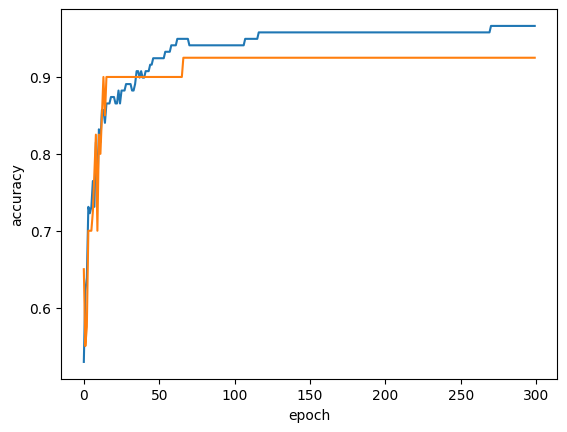

In [361]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#훈련세트와 테스트세트의 갭이 점점 벌어지는걸 볼 수 있다. 많이 훈련할 수록. 
#100 정도의 에포크가 가장 적절한 절충점으로 보인다. 

In [362]:
sc = SGDClassifier(loss='log_loss', max_iter=100,
                  tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [363]:
sc = SGDClassifier(loss='hinge', max_iter=100,
                  tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
